In [26]:
import pandas as pd
from tabulate import tabulate  # Formato tabular para la consola

# Cargar los datos desde la URL de GitHub
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataScience/refs/heads/main/Riesgo%20crediticio1.csv"
data = pd.read_csv(url, sep=';')

# Imputar valores nulos en OCCUPATION_TYPE con "Desconocido"
data['OCCUPATION_TYPE'].fillna('Desconocido', inplace=True)

# Eliminar filas con valores nulos en AMT_ANNUITY y AMT_GOODS_PRICE
data.dropna(subset=['AMT_ANNUITY', 'AMT_GOODS_PRICE'], inplace=True)

# Visualizar la tabla en formato similar a Excel
print(tabulate(data.head(), headers='keys', tablefmt='grid'))


+----+------------+---------------+----------------+-------------------+----------------+--------------------+---------------+-------------------+-------------------------------+----------------------+---------------------+--------------+-----------------+-------------------+-----------------+---------------+------------------+--------------------------+-----------------+------------------+
|    | ClientID   | CODE_GENDER   | FLAG_OWN_CAR   | FLAG_OWN_REALTY   |   CNT_CHILDREN |   AMT_INCOME_TOTAL |   AMT_ANNUITY |   AMT_GOODS_PRICE | NAME_EDUCATION_TYPE           | NAME_FAMILY_STATUS   | NAME_HOUSING_TYPE   |   DAYS_BIRTH |   DAYS_EMPLOYED | OCCUPATION_TYPE   | CREDIT_ACTIVE   |   DAYS_CREDIT |   AMT_CREDIT_SUM |   AMT_CREDIT_SUM_OVERDUE | CREDIT_TYPE     | CITY             |
+====+============+===============+================+===================+================+====================+===============+===================+===============================+======================+===========

1) Definición de 
objetivo
Objetivo: Predecir el monto de la anualidad ('AMT_ANNUITY') basado en las características socioeconómicas y crediticias de los clientes.


2) Contexto comercial


Contexto: Los datos incluyen información crediticia y demográfica de clientes para evaluar el riesgo crediticio. 

Estos insights pueden ser utilizados para optimizar estrategias de aprobación de crédito.


3) Problema comercial


Problema: Identificar factores clave que afectan el monto de la anualidad y construir un modelo para predecir esta variable con precisión.


4) Contexto analítico

Descripción de los Datos:

Variables utilizadas incluyen:
CNT_CHILDREN: Número de hijos dependientes.
AMT_INCOME_TOTAL: Ingreso total anual del cliente.
DAYS_BIRTH: Edad en días (como valor negativo).
DAYS_EMPLOYED: Días de empleo (como valor negativo).
AMT_GOODS_PRICE: Precio de los bienes financiados.
Limpieza realizada:
Imputación de valores faltantes (OCCUPATION_TYPE completada con "Desconocido").
Eliminación de filas con valores nulos en AMT_ANNUITY y AMT_GOODS_PRICE



5) Exploración de datos (EDA)


       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  20003.000000      2.000300e+04   20001.000000     1.999000e+04   
mean       0.422987      1.698577e+05   27135.660117     5.374641e+05   
std        0.721425      1.160785e+05   14599.915125     3.693995e+05   
min        0.000000      2.610000e+04    2542.500000     4.500000e+04   
25%        0.000000      1.125000e+05   16573.500000     2.385000e+05   
50%        0.000000      1.485000e+05   24903.000000     4.500000e+05   
75%        1.000000      2.025000e+05   34542.000000     6.795000e+05   
max        5.000000      9.000000e+06  225000.000000     4.050000e+06   

         DAYS_BIRTH  DAYS_EMPLOYED   DAYS_CREDIT  AMT_CREDIT_SUM  \
count  20003.000000   20003.000000  20003.000000    2.000300e+04   
mean  -16024.069540   63673.458331  -1136.606209    3.488029e+05   
std     4353.685425  141154.412778    799.058479    1.045054e+06   
min   -25140.000000  -16495.000000  -2922.000000    0.000000e+00   
25

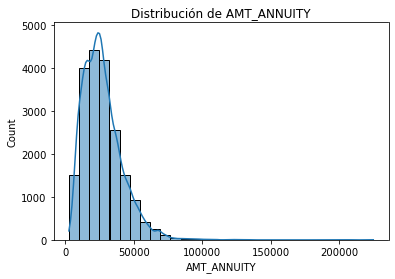

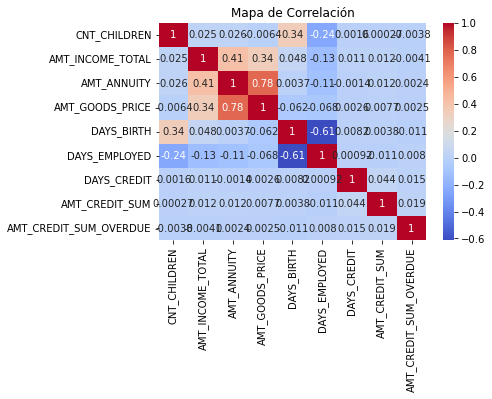

In [3]:
# Descripción estadística
print(data.describe())
print(data.info())

# Visualización inicial
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['AMT_ANNUITY'], kde=True, bins=30)
plt.title('Distribución de AMT_ANNUITY')
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación')
plt.show()



6) Data Engineering


In [4]:
# Limpieza e imputación ya realizada:
data['OCCUPATION_TYPE'].fillna('Desconocido', inplace=True)
data.dropna(subset=['AMT_ANNUITY', 'AMT_GOODS_PRICE'], inplace=True)

# Selección de características:
X = data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE']]
y = data['AMT_ANNUITY']

# Dividir los datos en entrenamiento y prueba:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7) Selección del algoritmo adecuado


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Crear pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

8) Desarrollo de algoritmo


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = pipeline.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Métricas del Modelo:")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.2f}")


Métricas del Modelo:
MSE (Error Cuadrático Medio): 84854612.45
R² (Coeficiente de Determinación): 0.62


9) Interpretación


Distribución de AMT_ANNUITY:

La distribución de la variable objetivo (AMT_ANNUITY) es sesgada hacia la derecha, lo que indica que la mayoría de los clientes tienen anualidades más bajas, mientras que un pequeño porcentaje tiene anualidades muy altas.
Mapa de correlación:

AMT_ANNUITY tiene una fuerte correlación con AMT_GOODS_PRICE (0.78), lo que sugiere que las anualidades están estrechamente ligadas al precio de los bienes adquiridos.
La correlación con otras variables es más débil, lo que implica que AMT_ANNUITY podría no depender tanto de características como CNT_CHILDREN o DAYS_EMPLOYED.
Datos estadísticos:

Algunas columnas, como DAYS_EMPLOYED, tienen valores extremos (positivos y negativos), probablemente indicando datos incorrectos o valores que requieren limpieza.
La media y los percentiles de variables como AMT_INCOME_TOTAL y AMT_GOODS_PRICE reflejan una población mayoritaria con ingresos y precios de bienes moderados, pero con valores extremos que necesitan revisión.
2. Evaluación del modelo
MSE (Error Cuadrático Medio): 84,854,612.45
Este valor indica un error considerable en la predicción de anualidades en términos absolutos. Dado que las anualidades tienen un rango amplio, un error de este nivel podría ser aceptable en algunos casos, pero mejorable.
R² (Coeficiente de Determinación): 0.62
Este valor sugiere que el modelo explica el 62% de la variabilidad en los datos. Aunque es razonable, hay margen para mejorar, quizás explorando nuevas características o ajustando el modelo.

10) Conclusiones

Correlaciones útiles:

Las variables más importantes para explicar AMT_ANNUITY parecen ser AMT_GOODS_PRICE y, en menor medida, AMT_INCOME_TOTAL. Esto sugiere que el precio de los bienes y el ingreso total son determinantes clave.
Limpieza de datos necesaria:

DAYS_EMPLOYED muestra valores inconsistentes (positivos y extremadamente grandes). Esto podría afectar la precisión del modelo y debe corregirse.
La columna AMT_CREDIT_SUM_OVERDUE tiene un promedio bajo (18.58), pero su desviación estándar es alta (1046.91), lo que podría indicar valores atípicos.
Modelo de predicción:

La métrica R² es aceptable, pero se puede mejorar. Opciones:
Añadir características como variables categóricas (ejemplo: CITY o NAME_FAMILY_STATUS) después de codificarlas.
Probar modelos adicionales, como Gradient Boosting o XGBoost, para comparar resultados.
Experimentar con la ingeniería de características, por ejemplo, creando interacciones entre variables.
Sesgo en los datos:

La distribución sesgada de AMT_ANNUITY podría justificar una transformación (como logarítmica) para mejorar el ajuste del modelo.
